In [ ]:
I decided to treat this as a classification problem by creating a new binary  variable affair (did the woman have at least one affair?) and trying to  predict the classification for each woman. 
Dataset 
The dataset I chose is the affairs dataset that comes with Statsmodels. It  was derived from a survey of women in 1974 by Redbook magazine, in  which married women were asked about their participation in extramarital  affairs. More information about the study is available in a 1978 paper from  the Journal of Political Economy. 
Description of Variables 
The dataset contains 6366 observations of 9 variables: 
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =  very good) 
age: woman's age 
yrs_married: number of years married 
children: number of children 
religious: woman's rating of how religious she is (1 = not religious, 4 =  strongly religious) 
educ: level of education (9 = grade school, 12 = high school, 14 =  some college, 16 = college graduate, 17 = some graduate school, 20  = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semi skilled/unskilled, 3 = "white collar", 4 =  
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =  professional with advanced degree) 
occupation_husb: husband's occupation (same coding as above) affairs: time spent in extra-marital affairs 
Code to loading data and modules: 


In [123]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model  import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn  import metrics 
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
dta =  sm.datasets.fair.load_pandas().data


In [9]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [120]:
# q = dta['occupation'].quantile(0.98)
# w=dta['occupation'].quantile(0.05)
# quantiled_data = dta[dta['occupation']<q]
# quantiled_data=quantiled_data[quantiled_data['occupation']>w]
# q=quantiled_data['affairs'].quantile(0.90)
# quantiled_data=quantiled_data[quantiled_data['affairs']<q]
# q=quantiled_data['rate_marriage'].quantile(0.10)
# quantiled_data=quantiled_data[quantiled_data['rate_marriage']>q]
# q=quantiled_data['children'].quantile(0.99)
# quantiled_data=quantiled_data[quantiled_data['children']<q]


<AxesSubplot:>

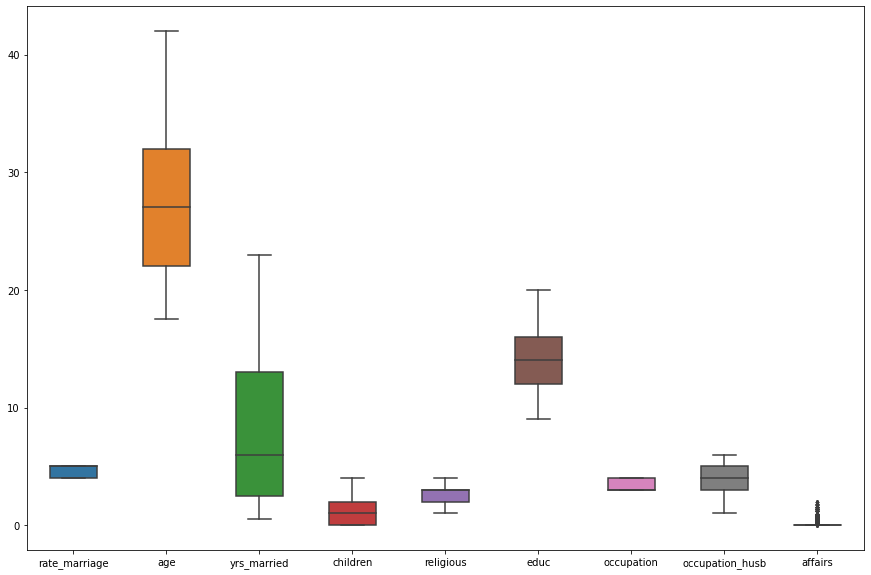

In [132]:
# #outlier detection
# fig, ax = plt.subplots(figsize=(15,10))
# sns.boxplot(data=quantiled_data, width= 0.5,ax=ax,  fliersize=3)


In [165]:
quantiled_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
15,4.0,37.0,9.0,2.0,2.0,14.0,3.0,6.0,1.361111
27,5.0,37.0,13.0,1.0,3.0,12.0,3.0,4.0,0.615385
34,5.0,42.0,16.5,4.0,3.0,16.0,4.0,6.0,0.727273
38,5.0,37.0,16.5,3.0,3.0,12.0,3.0,5.0,0.212121
...,...,...,...,...,...,...,...,...,...
6357,5.0,32.0,13.0,4.0,2.0,14.0,4.0,4.0,0.000000
6360,5.0,22.0,2.5,0.0,2.0,14.0,3.0,3.0,0.000000
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000


In [158]:
dta=quantiled_data.copy()

In [209]:
#add "affair" column: 1 represents having affairs, 0  represents not 
dta['affair'] = (dta.affairs >  0).astype(int) 
dta['affair']

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [14]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [210]:
y, X = dmatrices('affair ~rate_marriage + age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',dta,return_type='dataframe')

In [211]:
X = X.rename(columns =  
{'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3', 
'C(occupation)[T.4.0]':'occ_4', 
'C(occupation)[T.5.0]':'occ_5', 
'C(occupation)[T.6.0]':'occ_6', 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 

In [171]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [212]:
y = np.ravel(y) 


<AxesSubplot:>

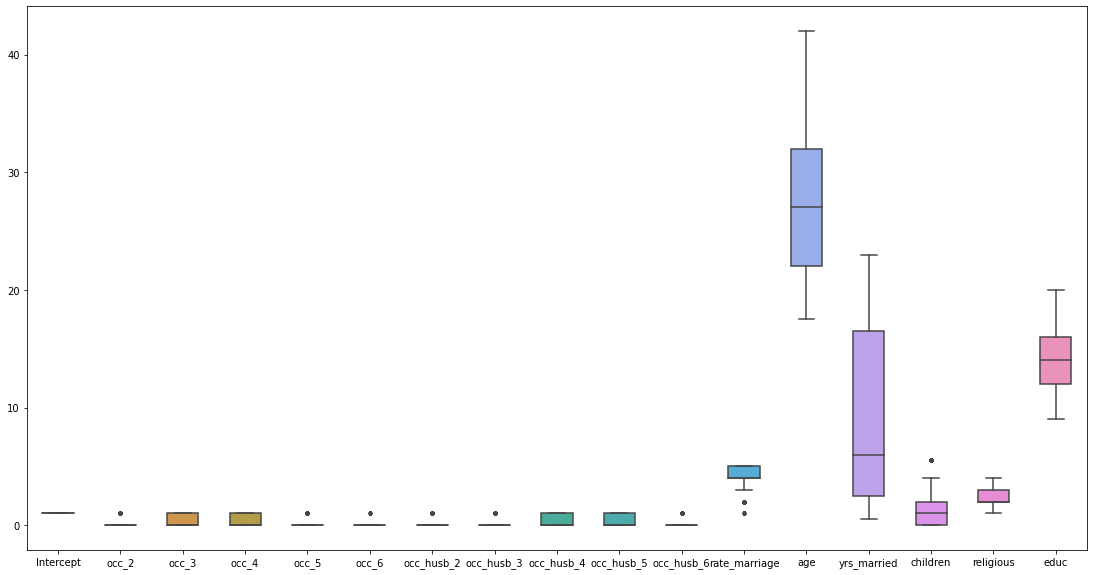

In [213]:
#outlier detection
fig, ax = plt.subplots(figsize=(19,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

In [214]:
q = X['occ_2'].quantile(0.99)

quantiled_data = X[X['occ_2']<q]
q = X['occ_5'].quantile(0.99)
quantiled_data=quantiled_data[quantiled_data['occ_5']<q]
q = X['occ_6'].quantile(0.99)
quantiled_data=quantiled_data[quantiled_data['occ_6']<q]
q = X['occ_husb_2'].quantile(0.99)
quantiled_data=quantiled_data[quantiled_data['occ_husb_2']<q]
q = X['occ_husb_3'].quantile(0.99)
quantiled_data=quantiled_data[quantiled_data['occ_husb_3']<q]
q = X['occ_husb_6'].quantile(0.99)
quantiled_data=quantiled_data[quantiled_data['occ_husb_6']<q]
q=quantiled_data['rate_marriage'].quantile(0.10)
quantiled_data=quantiled_data[quantiled_data['rate_marriage']>q]
q=quantiled_data['children'].quantile(0.99)
quantiled_data=quantiled_data[quantiled_data['children']<q]


<AxesSubplot:>

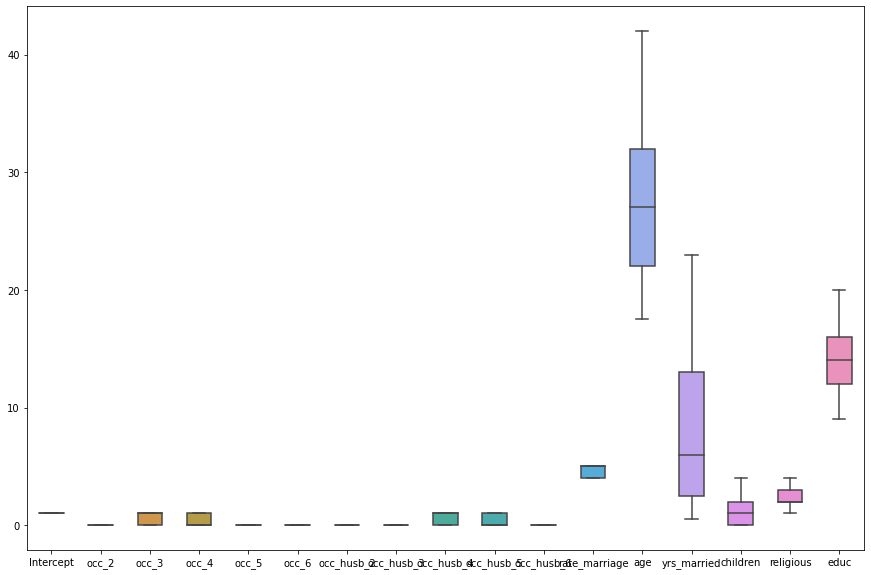

In [215]:
#outlier detection
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=quantiled_data, width= 0.5,ax=ax,  fliersize=3)

In [138]:
X.describe()

,Intercept,occ_4,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,3244.0,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000
mean,1.0,0.418311,0.174476,0.084772,0.336621,0.282367,0.080148,4.554562,28.481350,8.145499,1.159679,2.483970,14.465783
std,0.0,0.493358,0.379577,0.278585,0.472627,0.450221,0.271564,0.497091,6.638991,7.020681,1.236620,0.878033,2.153614
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,27.000000,6.000000,1.000000,3.000000,14.000000
75%,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,13.000000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,4.000000,4.000000,20.000000


In [34]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [216]:
X2=X.copy()
X2['Married_At_Age']=X.apply(lambda x:x['age']-x['yrs_married'],axis=1)
X=X2.drop(['age','yrs_married'],axis=1)
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,children,religious,educ,Married_At_Age
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,17.0,23.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,1.0,14.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,16.0,19.5
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,3.0,16.0,20.5
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,14.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,3.0,17.0,19.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,16.0,19.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,14.0,19.5
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,3.0,14.0,26.0


In [217]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [218]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,NaN,Intercept
1,19.339591,occ_2
2,39.304514,occ_3
3,32.917087,occ_4
4,17.028493,occ_5
5,3.694252,occ_6
6,5.554168,occ_husb_2
7,2.977500,occ_husb_3
8,6.910899,occ_husb_4
9,6.530082,occ_husb_5


In [219]:
X=X.drop(['Intercept','occ_3','occ_husb_4'],axis=1)
X

,occ_2,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_5,occ_husb_6,rate_marriage,children,religious,educ,Married_At_Age
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,17.0,23.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,14.0,14.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,16.0,19.5
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,3.0,16.0,20.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,14.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,3.0,17.0,19.0
6362,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,16.0,19.0
6363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,14.0,19.5
6364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,3.0,14.0,26.0


In [220]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [221]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.170196,occ_2
1,1.579735,occ_4
2,1.148554,occ_5
3,1.166259,occ_6
4,1.293208,occ_husb_2
5,1.132701,occ_husb_3
6,1.313041,occ_husb_5
7,1.222309,occ_husb_6
8,1.035327,rate_marriage
9,1.185923,children


In [222]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [223]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [224]:
y_pred=log_reg.predict(x_test)

In [225]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7248743718592965

In [226]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[980, 104],
       [334, 174]], dtype=int64)

In [227]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
true_negative=conf_mat[1][1]
false_negative=conf_mat[1][0]

In [228]:
Precision=true_positive/(true_positive+false_positive)
Precision

0.9040590405904059

In [229]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.745814307458143

In [230]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.817347789824854

In [232]:
log_reg.predict([[1,0,0,0,0,0,0,1,4,2,4,20,28]])

array([0.])